## Laboratory 2: Naïve Bayes Classifiers, Part 1

### Step 1: Exploring and Preparing the Data

In [3]:
import pandas as pd 
input_file = "/Users/hit028/Desktop/530/Lab2/creditData.csv" 
credit = pd.read_csv(input_file)
credit.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
credit.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

Q1- What is your suggestion if you see any NA values?

Answer: Depending on cases, we can eithr impute or drop the missing values.

Next, use a 75%/25% split for training and test data, i.e. use 75% of the records for the training set and 25% of the records for the test set. Report the number of missing values you find in the data in your results report. Use the randomization seed of 123.

In [7]:
target = credit['Creditability']
target.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [8]:
import random
random.seed(123)
indx = random.sample(range(0, 1000), 1000)
credit_rand = credit.iloc[indx]
target_rand = target.iloc[indx]

In [9]:
credit_train = credit_rand.iloc[0:75]
credit_test = credit_rand.iloc[750:1000]
target_train = target_rand.iloc[0:750]
target_test = target_rand.iloc[750:1000]

In [10]:
target_train.value_counts()/750

1    0.692
0    0.308
Name: Creditability, dtype: float64

In [11]:
target_test.value_counts()/250

1    0.724
0    0.276
Name: Creditability, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
y = target
X = credit.drop(['Creditability'], axis=1)

Check the percentage of targets for both training and testing.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [15]:
y_train.value_counts()/y_train.shape

1    0.713333
0    0.286667
Name: Creditability, dtype: float64

Q2- Compute the percentage of both classes similar to what you did in lab 1 and see if the distribution of both classes preserved for both training and testing data.

Line[12] & Line[20]

### Step 2: Training a Model on the Data

Use the GaussianNB()function on your training data to build the Naïve Bayes Classifier.

In [19]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
gnb = GaussianNB() 
gnb = gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)

### Step 3: Evaluating Model Performance

Now, use the processes we have completed before to evaluate your Naïve Bayes Classifier. (Hint: If you didn’t convert your class variable before you will not be able to complete this step!) In your results report include your confusion table showing your results. Be sure to include 2-3 sentences explaining what those results actually mean.

In [22]:
accuracy_score(y_test, y_predict)*100

76.4

## Laboratory 2: Naïve Bayes Classifiers, Part 2

### Step 1: Exploring and Preparing the Data

[Text(0, 0, 'Account Balance'),
 Text(0, 0, 'Duration of Credit (month)'),
 Text(0, 0, 'Payment Status of Previous Credit'),
 Text(0, 0, 'Purpose'),
 Text(0, 0, 'Credit Amount'),
 Text(0, 0, 'Value Savings/Stocks'),
 Text(0, 0, 'Length of current employment'),
 Text(0, 0, 'Instalment per cent'),
 Text(0, 0, 'Sex & Marital Status'),
 Text(0, 0, 'Guarantors'),
 Text(0, 0, 'Duration in Current address'),
 Text(0, 0, 'Most valuable available asset'),
 Text(0, 0, 'Age (years)'),
 Text(0, 0, 'Concurrent Credits'),
 Text(0, 0, 'Type of apartment'),
 Text(0, 0, 'No of Credits at this Bank'),
 Text(0, 0, 'Occupation'),
 Text(0, 0, 'No of dependents'),
 Text(0, 0, 'Telephone'),
 Text(0, 0, 'Foreign Worker')]

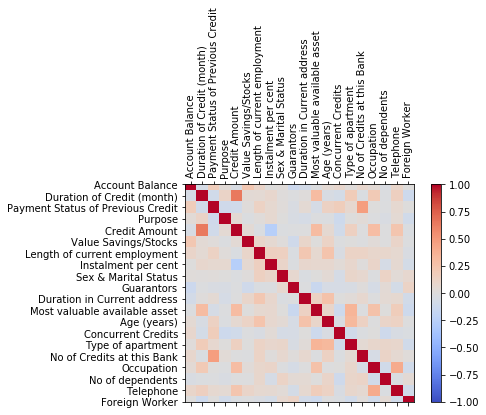

In [70]:
import matplotlib.pyplot as plt
import numpy as np

corr = X_train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1) 
fig.colorbar(cax)
ticks = np.arange(0,len(X_train.columns),1) 
ax.set_xticks(ticks)
plt.xticks(rotation = 90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(X_train.columns) 
ax.set_yticklabels(X_train.columns) 

In [71]:
plt.show()

In [ ]:
# print the variable corr to see actual value of correlations
print(corr)

In [ ]:
# Remove the features that have correlation over 0.6.
# Create correlation matrix 
corr_matrix = X.corr().abs()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [ ]:
# Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [ ]:
Xnew = X.drop(to_drop, axis=1)

#### Split your data in the similar way that you did in previous section.

In [33]:
from sklearn.model_selection import train_test_split

target_train.value_counts()/750
target_test.value_counts()/250

1    0.724
0    0.276
Name: Creditability, dtype: float64

### Step 2: Training a Model on the Data At this point we follow the same process that we have before. To train the model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.25, random_state=123)

gnb2 = GaussianNB() 
gnb2 = gnb.fit(Xnew_train, y_train)
y_predict2 = gnb.predict(Xnew_test)

### Step 3: Evaluating Model Performance.

In [37]:
accuracy_score(y_test, y_predict2)*100

77.2

Q3- What is the accuracy this time? Be sure to include in your results report whether or not, after all this work, the performance of your Naïve Bayes Classifier was improved.

Answer: 77.2%

## Laboratory 2: Support Vector Machine, Part 3

### Step 1: Collecting the Data

In [41]:
input_file = "/Users/hit028/Desktop/530/Lab2/letterdata.csv" 
letters = pd.read_csv(input_file)
letters.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


### Step 2: Preparing the Data

In [43]:
target3 = letters['letter']
target3.value_counts()

import random
random.seed(12345)
indx3 = random.sample(range(0, 1000), 1000)
letter_rand3 = letters.iloc[indx]
target_rand3 = target3.iloc[indx]

letter_train3 = letter_rand3.iloc[0:90]
letter_test3 = letter_rand3.iloc[900:1000]
target_train3 = target_rand3.iloc[0:900]
target_test3 = target_rand3.iloc[900:1000]

target_train3.value_counts()/900

target_test3.value_counts()/100

from sklearn.model_selection import train_test_split
y3 = target3
X3 = letters.drop(['letter'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.1, random_state=123)

### Step 3: Training a Model on the Data

In [45]:
from sklearn import svm
# Design the model
clf3 = svm.SVC(kernel='linear') 
#clf = svm.LinearSVC(C=1) 
clf3.fit(X3_train, y3_train) 
y_predict3 = clf3.predict(X3_test)

### Step 4: Evaluating Model Performance

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y3_test, y_predict3)

array([[97,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 60,  0,  2,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  2,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 62,  0,  1,  0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  6,  0, 73,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0, 62,  0,  4,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  2,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1, 60,  1,  0,  0,  0,  0,  0,  0,  1,  0,  4,
         0,  0,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  2,  2,  0, 60,  1,  0,  0,  2,  2,  0,  0,  1,  1,
         0,  1,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  4,  0,  2,  1, 45,  0,  0,  5,  0,  0,  0,  2,  0,
         1,  6,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  4, 

In [48]:
# Now compute the accuracy.

accuracy_score(y3_test, y_predict3)*100

86.15

Q4- We may be able to do better than this by changing the Kernels. Try Polynomial and RBF kernels to improve the result.

In [50]:
clf32 = svm.SVC(kernel = 'poly', degree=3)
clf32.fit(X3_train, y3_train)

/Users/hit028/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
y_predict32 = clf32.predict(X3_test)
accuracy_score(y3_test, y_predict32)*100

95.85000000000001

In [52]:
clf33 = svm.SVC(kernel = 'rbf', gamma =0.3)
clf33.fit(X3_train, y3_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y_predict33 = clf33.predict(X3_test) 
accuracy_score(y3_test, y_predict33)*100 

92.4

## Laboratory 2: News popularity, Part 4

Now apply the Naïve Bayes classifier and SVM that you saw in Parts 1 through 3 on News popularity data set from lab 1. Running SVM on original dataset will take a long time. To resolve this issue, normalize the data and/or try to remove some of the features or consider less number of instances for training.

### Step 1: Collecting the Data

In [57]:
import pandas as pd 
input_file4 = "/Users/hit028/Desktop/530/530 Lab1/OnlineNewsPopularityP.csv"
news = pd.read_csv(input_file4)
news.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Step 2: Preparing the Data

In [72]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bus              39644 non-null int64
data_channel_is_so

In [59]:
target4 = news['shares']
target4.value_counts()

1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
          ... 
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, Length: 1454, dtype: int64

In [99]:
popular = news.shares >= 1400
unpopular = news.shares < 1400 
news.loc[popular,'shares'] = 1 
news.loc[unpopular,'shares'] = 0

import random
random.seed(12345)
indx4 = random.sample(range(0, 1000), 1000) 
news_rand = news.iloc[indx3] 
target4_rand = target3.iloc[indx3]

news_train = news_rand.iloc[0:700] 
news_test = news_rand.iloc[700:1000]
target4_train = target4_rand.iloc[0:700] 
target4_test = target4_rand.iloc[700:1000]

In [100]:
y4 = target4
X4 = news.drop(['url', 'shares'], axis=1)

In [101]:
from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.30, random_state = 12345)
y4_train.value_counts()/y4_train.shape

1    0.531568
0    0.468432
Name: shares, dtype: float64

### Step 3: Training a Model on the Data

#### Naïve Bayes Classifier

In [104]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
gnb4 = GaussianNB() 
gnb4 = gnb4.fit(X4_train, y4_train)
y_predict41 = gnb4.predict(X4_test)

In [105]:
accuracy_score(y4_test, y_predict41)*100

49.394652766100556

#### SVM

In [106]:
# Find all column names to select some for SVM
import pandas as pd  
for col in news.columns: 
    print(col) 

url
timedelta
n_tokens_title
n_tokens_content
n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
num_keywords
data_channel_is_lifestyle
data_channel_is_entertainment
data_channel_is_bus
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
kw_min_min
kw_max_min
kw_avg_min
kw_min_max
kw_max_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
weekday_is_monday
weekday_is_tuesday
weekday_is_wednesday
weekday_is_thursday
weekday_is_friday
weekday_is_saturday
weekday_is_sunday
is_weekend
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
min_positive_polarity
max_positive_polarity
avg_negative_polarity
min_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
a

In [107]:
# Select the last 5 columns to include 'shares'.

col_start = news.columns.get_loc('title_subjectivity')
col_end = news.columns.get_loc('title_subjectivity')+5
col_start, col_end

(56, 61)

In [108]:
news.iloc[:100, col_start:col_end]

,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.500000,-0.187500,0.000000,0.187500,0
1,0.000000,0.000000,0.500000,0.000000,0
2,0.000000,0.000000,0.500000,0.000000,1
3,0.000000,0.000000,0.500000,0.000000,0
4,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...
95,0.000000,0.000000,0.500000,0.000000,1
96,1.000000,-1.000000,0.500000,1.000000,1
97,0.200000,-0.100000,0.300000,0.100000,0
98,0.000000,0.000000,0.500000,0.000000,0


In [109]:
# news2 is now my new data set for SVM.

news2 = news.iloc[:100, col_start:col_end]

In [110]:
# Preparing data - reset target

target42 = news2['shares']
target42.value_counts()

0    62
1    38
Name: shares, dtype: int64

In [111]:
import random
random.seed(12345)
indx42 = random.sample(range(0, 100), 100) 
news2_rand = news2.iloc[indx42] 
target42_rand = target42.iloc[indx42]

In [112]:
news2_train = news2_rand.iloc[0:70]
news2_test = news2_rand.iloc[700:1000]
target42_train = target42_rand.iloc[0:700]
target42_test = target42_rand.iloc[700:1000]

target42_train.value_counts()/700

target42_test.value_counts()/300

from sklearn.model_selection import train_test_split
y42 = target42
X42 = news2.drop(['shares'], axis=1)

X42_train, X42_test, y42_train, y42_test = train_test_split(X42, y42, test_size=0.3, random_state=123)

### Training a Model on the new data news2.

#### Linear kernel

In [115]:
from sklearn import svm
# Design the model
clf42 = svm.SVC(kernel = 'linear') 
#clf = svm.LinearSVC(C=1) 
clf42.fit(X42_train, y42_train) 
y_predict42 = clf42.predict(X42_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y42_test, y_predict42)

array([[17,  1],
       [12,  0]])

In [116]:
accuracy_score(y42_test, y_predict42)*100

56.666666666666664

#### Polynomial kernel

In [118]:
clf42 = svm.SVC(kernel = 'poly', degree=3)
clf42.fit(X42_train, y42_train)

/Users/hit028/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [119]:
y_predict42 = clf42.predict(X42_test)
accuracy_score(y42_test, y_predict42)*100

60.0

#### RBF kernel

In [121]:
clf43 = svm.SVC(kernel = 'rbf', gamma =0.3)
clf43.fit(X42_train, y42_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [122]:
y_predict43 = clf43.predict(X42_test) 
accuracy_score(y42_test, y_predict43)*100 

56.666666666666664

Q5- Do you see any improvement compared to last three techniques? Please completely explain your results and analysis.

Answer: As a summary, I got the accuracy sccore for Naïve Bayes Classifiers = 49.4%, SVM Linear & rbf = 56.7%, and SVM polynomial kernel = 60%. This backs up the result of the previous dataset analysis, adn I can conclude that the best method to get the highest accuracy score is using SVM with polynomial kernel.